<span><font size="5"><b>Credit:</b></font></span>

<br>I learnt and copied a lot from</br>

<br><b>[Konstantin: Titanic [0.82] - [0.83]]</b><a href='https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83'>(https://www.kaggle.com/konstantinmasich/titanic-0-82-0-83)</a></br>
<br><b>[Chris Deotte: Titanic using Name Only]</b><a href='https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818'>(https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818)</a></br>
<br><b>[Yvon Dalat: Titanic, a step-by-step intro to Machine Learning]</b><a href='https://www.kaggle.com/ydalat/titanic-a-step-by-step-intro-to-machine-learning'>(https://www.kaggle.com/ydalat/titanic-a-step-by-step-intro-to-machine-learning)</a></br>
<br><b>[Anisotropic: ~0.808 with Simple Stacking]</b><a href='https://www.kaggle.com/arthurtok/0-808-with-simple-stacking'>(https://www.kaggle.com/arthurtok/0-808-with-simple-stacking)</a></br>

<br>Thank you for making these nice kernels.</br>

# 1. Data Visualization and Preprocessing

## A. Load Python Libraries

In [1]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization

%matplotlib inline

import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

# Machine learning libraries
import sys
sys.path.append('/Users/minjielu/anaconda3/envs/python/lib/python3.5/site-packages')

import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

/Users/minjielu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



## B. Load and Visualize Dataset

In [2]:
# Load train and test datasets from CSV files
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Record passenger ids of test set for composing submission files
passengerid = test['PassengerId']

full_data = [train,test]

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.1000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [4]:
train.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q
67,959,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,113796,42.4000,NaN,S
222,1114,2,"Cook, Mrs. (Selena Rogers)",female,22.0,0,0,W./C. 14266,10.5000,F33,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


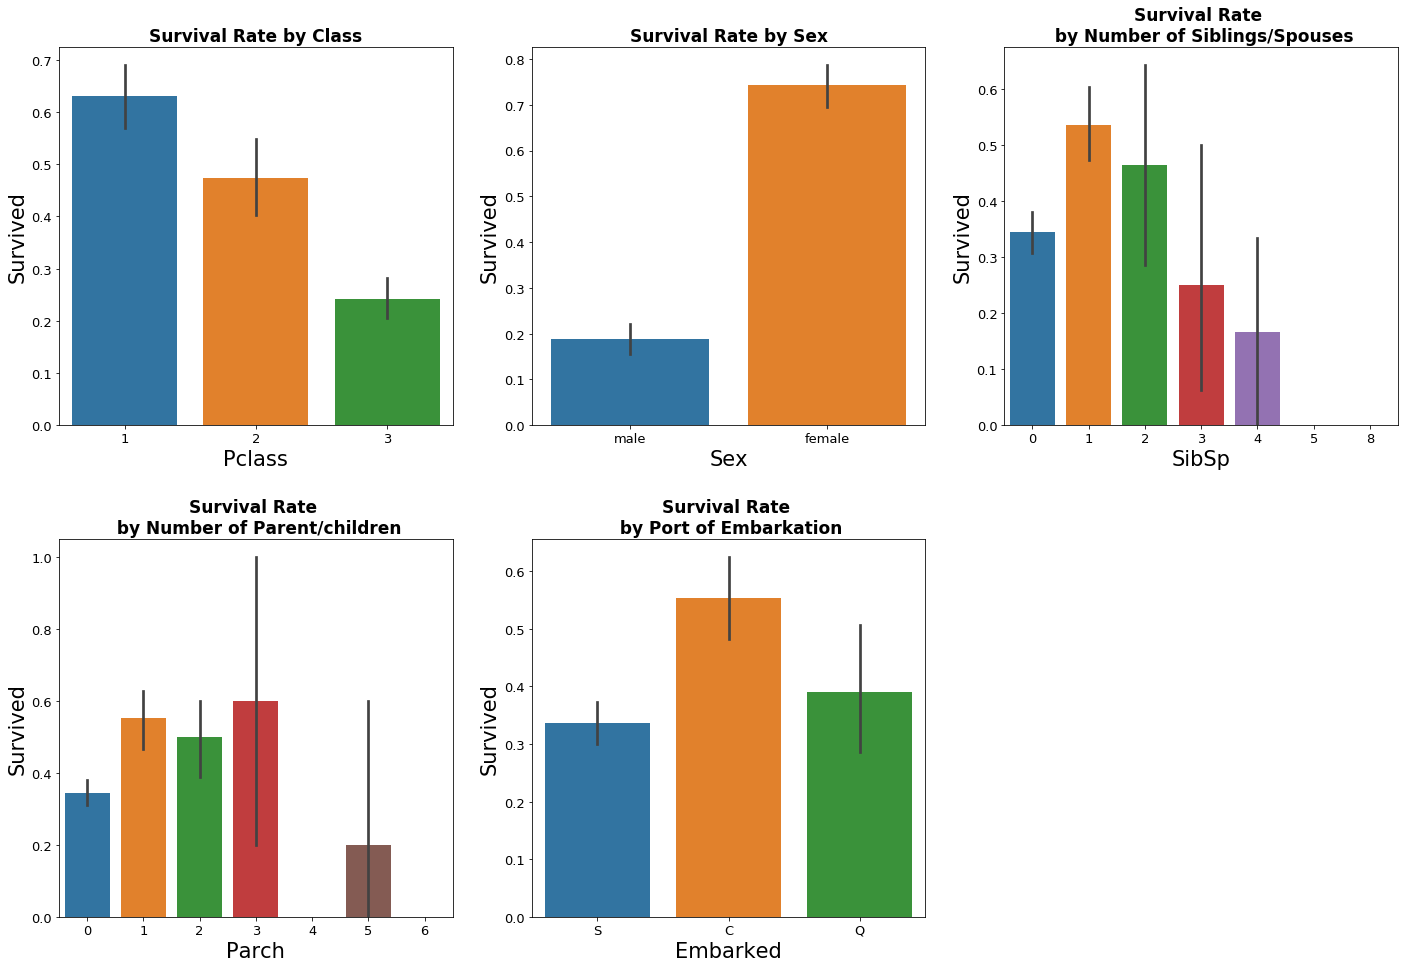

In [9]:
# Set font sizes for figure display
SMALL_SIZE = 13
MEDIUM_SIZE = 17
LARGE_SIZE = 21

plt.rc('font', size=SMALL_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the titles
plt.rc('axes', labelsize=LARGE_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels

f,ax = plt.subplots(2,3,figsize=(24,16))

f.subplots_adjust(wspace=0.2,hspace=0.3)
f.delaxes(ax[1,2])

sns.barplot(x='Pclass',y='Survived',data=train,ax=ax[0,0])
sns.barplot(x='Sex',y='Survived',data=train,ax=ax[0,1])
sns.barplot(x='SibSp',y='Survived',data=train,ax=ax[0,2])
sns.barplot(x='Parch',y='Survived',data=train,ax=ax[1,0])
sns.barplot(x='Embarked',y='Survived',data=train,ax=ax[1,1])

_ = ax[0,0].set_title('Survival Rate by Class',fontweight='bold')
_ = ax[0,1].set_title('Survival Rate by Sex',fontweight='bold')
_ = ax[0,2].set_title('Survival Rate \n by Number of Siblings/Spouses',fontweight='bold')
_ = ax[1,0].set_title('Survival Rate \n by Number of Parent/children',fontweight='bold')
_ = ax[1,1].set_title('Survival Rate \n by Port of Embarkation',fontweight='bold')

__Observations from these plots__

1. __Sex__ plays a very determinant role on deciding survival rate. Female has a much higher survival rate since ladies and children first.
2. Survival rate increases when __Pclass__ becomes higher. 
3. Passengers with no __SibSp__ on board have a less survival rate. It is understandable since these passengers are trying to survive by themselves. Except for these lonely individuals, survival rate generally decreases when __SibSp__ increases.
4. The same rule can be observed for __Parch__. Even though passengers with 3 parent and children have a high survival rate, but there is not enough samples so the deviation is large.
5. Passengers __Embarked__ at Cherbourg have the best survival rate. Those __Embarked__ at Southampton have the worst survival rate.
6. From the train dataset, categories of passengers having a survival rat e larger than 0.5 include passenger of the first class, female passengers, passengers with 1 siblings/spouses or 1 or 2 parent/children, and passengers embark at Cherbourg.

In [10]:
# Fill nan items in Embarked
# Since only two items in the train set have nan Embarked, it should be
# okay to suppose they all embarked at Southampton where most passengers embarked
train['Embarked'] = train['Embarked'].fillna('S')

# Map some literal attributes to integer attributes
# In order to support linear classifiers, attributes Embarked, SibSp and Parch are reordered
# so that categories of larger number has larger survival rate
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':2,'Q':1}).astype(int)

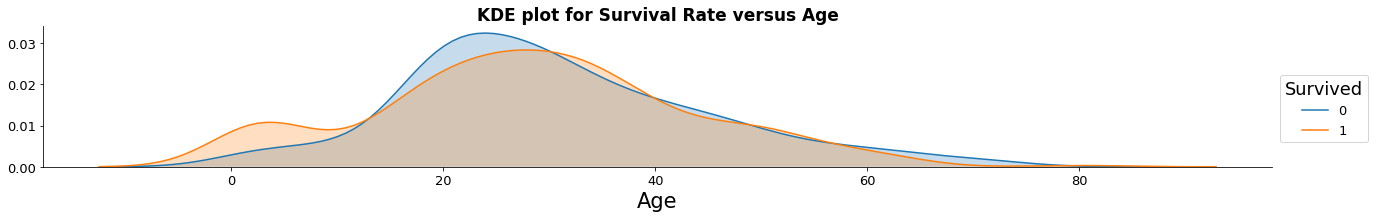

In [11]:
a = sns.FacetGrid(train,hue='Survived',aspect=6)
a.map(sns.kdeplot,'Age',shade=True)
a.add_legend()
_ = a.axes[0,0].set_title('KDE plot for Survival Rate versus Age',fontweight='bold')

In [12]:
# Skewness is a measurement of degree of asymmetry
train['Fare'].skew()

4.787316519674893

In [13]:
# Since attribute Fare has a very large skewness, it's better to change it to log
# scale to prevent machine learning models from being biassed
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

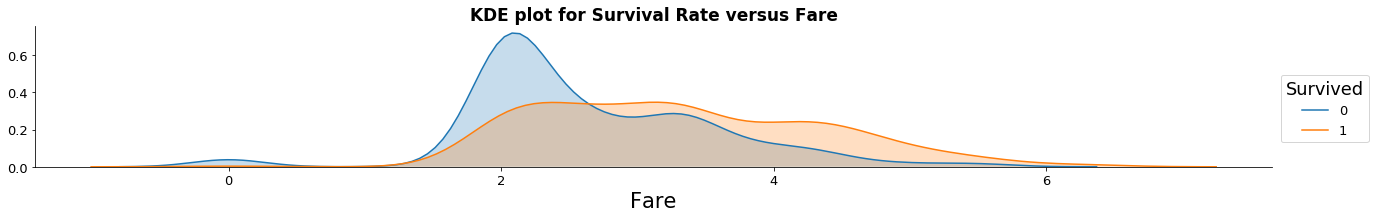

In [14]:
a = sns.FacetGrid(train,hue='Survived',aspect=6)
a.map(sns.kdeplot,'Fare',shade=True)
a.add_legend()
_ = a.axes[0,0].set_title('KDE plot for Survival Rate versus Fare',fontweight='bold')

__Observations from these plots__

1. Dividing attribute __Age__ to three ranges seems reasonable. Passengers younger than 14 years old have relatively large survival rate. Passengers between 14 and 31 years old have relatively small survival rate. Passengers older than 31 years old have survival rate in between.
2. Dividing attribute __Fare__ to two ranges seems reasonable. Passengers who paid more than 2.6 have a survival rate less than those who paid less than 2.6 (__Fare__ is in log scale).

## C. Engineer New Features

### i. Deck, Cabin_No and Has_Cabin: 

Three features can be extracted from attribute __Cabin__. __Deck__ is the leading letter in __Cabin__. __Cabin_No__ is the number in __Cabin__. Lots of passengers have nan __Cabin__. It can be supposed that they live in shared compartments.

Intuitively, location of __Cabin__ can have influence on survival. Peripheral cabins may get a higher survival chance. __Cabin__ in certain level may be better than other levels. These rules may hide in __Deck__ or patterns in __Cabin_No__. But from experience of myself and other kernels, __Deck__ and __Has_Cabin__ have little effect on improving prediction accuracy. Those passengers having nan __Cabin__ may just mean their __Cabin__ information is missed. I didn't try the __Cabin_No__ attribute.

### ii. Title:

Title can be extracted from attribute __Name__. __Title__ is a very important feature. __Sex__ can be inferred from __Title__. __Age__ can be inferred from __Title__ too. For example, Miss and Master are usually for girls. Class of passenger can also be inferred from __Title__. For example, Major and Col are always in the first class. __Title__ can also provide other information. For example, Revs all scarifice their lives to save others.

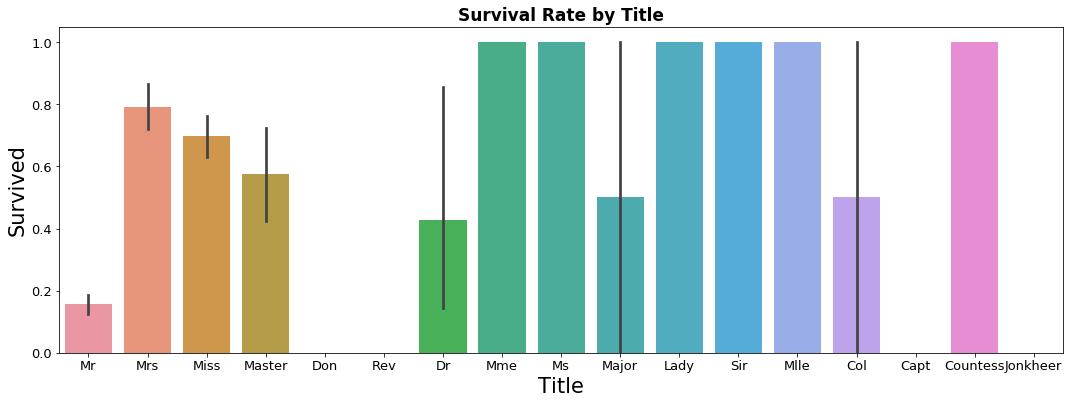

In [15]:
# Define a function to extract titles from names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.',name)
    # Return the title if one is found in the name. Return an empty string otherwise
    if title_search:
        return title_search.group(1)
    return ''

# Create a new attribute Title extracted from names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
f,ax1 = plt.subplots(1,1,figsize=(18,6))
TINY_SIZE = 7
plt.rc('xtick', labelsize=TINY_SIZE)
sns.barplot(x='Title',y='Survived',data=train,ax=ax1)

_ = ax1.set_title('Survival Rate by Title',fontweight='bold')

In [16]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Don           1
Jonkheer      1
Sir           1
Ms            1
Mme           1
Lady          1
Name: Title, dtype: int64

In [17]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [18]:
# Titles of a very small value count are combined into similar titles with large value count
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Dona','Mme','Countess','Lady','Ms'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle'],'Miss')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer','Don','Capt','Major','Col','Sir'],'Mr')
    dataset['Title_Mapped'] = dataset['Title'].map({'Mr':1,'Miss':4,'Mrs':5,'Master':3,'Dr':2,'Rev':0}).astype(int)

### iii. Fill Nan Items in Age:

This section is inserted here because __Title__ is needed.

There are different levels of techniques to insert missed items. First, one can just use the mean or median value of __Age__. Second, one can use the mean and standard deviation of __Age__ to generate random numbers for missed ages. Third, one can fill missed ages according to other passengers who share similar attributes.

In general, we want to spend less and get more. Generating random numbers for missed ages is reasonable even though it will statistically give you some wrong numbers.

But there are reasons for us to sake a better technique. Women_children model is very important for Titanic data set. If one male in test set is mislabelled by a small age, it's very possible that this man will be mispredicted alive. Since there are only few young boys, when random numbers are generated, there is large chance that young boys will be labelled as adults and some adults will be labelled as young boys. In the public leaderboard, above the gender model, ranking is actually influenced by few predictions. 

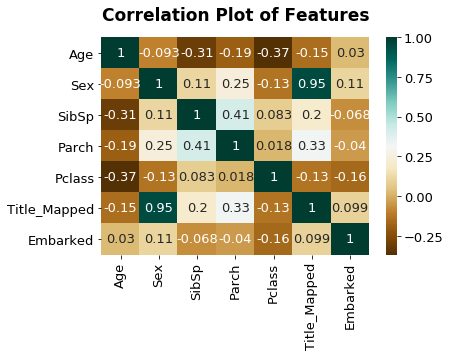

In [19]:
# Ticket and Cabin should have no relation to age. Correlations between Age and other attributes are examined
plt.rc('xtick', labelsize=SMALL_SIZE)
g = sns.heatmap(train[["Age","Sex","SibSp","Parch","Pclass",'Title_Mapped','Embarked']].corr(),cmap="BrBG",annot=True)
_ = g.set_title('Correlation Plot of Features', y=1.05, fontweight='bold')

From the correlation plot, we can find that __Parch__, __SibSp__, __Pclass__ and __Title__ are related to Age.

Here are some samples showing the feasibility of inferring __Age__ according to __Pclass__, __SibSp__, __Parch__ and __Title__. One lucky thing is that young boys are called 'Master'.

In [20]:
print('Average Age: {}'.format(train[(train['Parch'] == 2) & (train['SibSp'] == 4) & (train['Pclass'] == 3) & (train['Title'] == 'Miss')]['Age'].mean()))
train[(train['Parch'] == 2) & (train['SibSp'] == 4) & (train['Pclass'] == 3) & (train['Title'] == 'Miss')][['Parch','SibSp','Pclass','Title','Age']]

Average Age: 8.333333333333334


,Parch,SibSp,Pclass,Title,Age
68,2,4,3,Miss,17.0
119,2,4,3,Miss,2.0
233,2,4,3,Miss,5.0
541,2,4,3,Miss,9.0
542,2,4,3,Miss,11.0
813,2,4,3,Miss,6.0


In [21]:
print('Average Age: {}'.format(train[(train['Parch'] == 0) & (train['SibSp'] == 1) & (train['Pclass'] == 1) & (train['Title'] == 'Miss')]['Age'].mean()))
train[(train['Parch'] == 0) & (train['SibSp'] == 1) & (train['Pclass'] == 1) & (train['Title'] == 'Miss')][['Parch','SibSp','Pclass','Title','Age']]

Average Age: 40.8


,Parch,SibSp,Pclass,Title,Age
215,0,1,1,Miss,31.0
275,0,1,1,Miss,63.0
393,0,1,1,Miss,23.0
412,0,1,1,Miss,33.0
496,0,1,1,Miss,54.0


In [22]:
print('Average Age: {}'.format(train[(train['Parch'] == 2) & (train['SibSp'] == 4) & (train['Pclass'] == 3) & (train['Title'] == 'Master')]['Age'].mean()))
train[(train['Parch'] == 2) & (train['SibSp'] == 4) & (train['Pclass'] == 3) & (train['Title'] == 'Master')][['Parch','SibSp','Pclass','Title','Age']]

Average Age: 5.333333333333333


,Parch,SibSp,Pclass,Title,Age
182,2,4,3,Master,9.0
261,2,4,3,Master,3.0
850,2,4,3,Master,4.0


In [23]:
# Fill nan items in Age according to 'Pclass', 'Parch' and 'Title'
all_data = pd.concat([train,test],axis=0)
for dataset in full_data:
    index_nan_age = list(dataset['Age'][dataset['Age'].isna()].index)
    for i in index_nan_age:
        age_med = all_data[(all_data['Pclass'] == dataset.iloc[i]['Pclass']) & (all_data['SibSp'] == dataset.iloc[i]['SibSp']) & (all_data['Parch'] == dataset.iloc[i]['Parch']) & (all_data['Title'] == dataset.iloc[i]['Title'])]['Age'].median()
        # 6 passengers with 8 SibSp can't find references, therefore only Pclass, Parch and Title are used for them
        age_med_1 = all_data[(all_data['Pclass'] == dataset.iloc[i]['Pclass']) & (all_data['Parch'] == dataset.iloc[i]['Parch']) & (all_data['Title'] == dataset.iloc[i]['Title'])]['Age'].median()
        if not np.isnan(age_med):
            dataset.iloc[i,dataset.columns.get_loc('Age')] = age_med
        else:
            dataset.iloc[i,dataset.columns.get_loc('Age')] = age_med_1

In [24]:
# Combine categories of Title with similar survial rate
for dataset in full_data:
    dataset['Title_Mapped'] = dataset['Title_Mapped'].map({0:0,1:0,2:1,3:1,4:2,5:2}).astype(int)

### iv. Family_Size and IsAlone:

Number of __SibSp__ and __Parch__ can be summed to create __Family_Size__. Lots of kernels find this attribute useful. Afterwards, __IsAlone__ can be created to indicate whether a passenger has zero __SibSp__ and __Parch__. From experience of myself and other kernels, __IsAlone__ isn't helpful. 

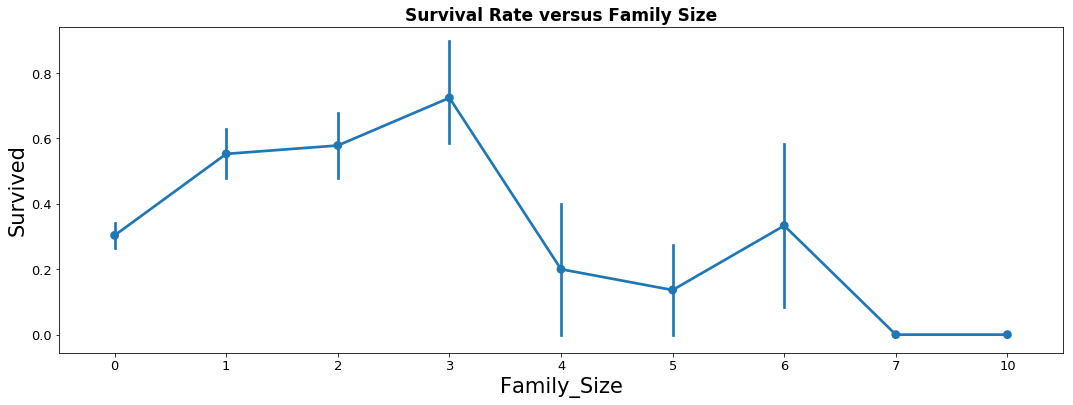

In [25]:
# Create attribute Family_Size
for dataset in full_data:
    dataset['Family_Size'] = dataset['SibSp']+dataset['Parch']
    
f,ax1 = plt.subplots(1,1,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=train,ax=ax1)
_ = ax1.set_title('Survival Rate versus Family Size',fontweight='bold')

In [26]:
for dataset in full_data:
    # Categories of family size are relabelled so that larger label has larger survival rate
    # Categories of family size with similar survival rate are combined
    dataset['Family_Size'] = dataset['Family_Size'].map({10:0,7:1,5:2,4:3,0:4,6:5,1:6,2:7,3:8}).astype(int)
    dataset['Family_Size'] = dataset['Family_Size'].map({0:0,1:0,2:1,3:1,4:2,5:2,6:3,7:3,8:3}).astype(int)
 
# SibSp and Parch are reordered to linear classifiers
for dataset in full_data:
    dataset['SibSp'] = dataset['SibSp'].map({5:0,8:1,4:2,3:3,0:4,2:5,1:6}).astype(int)
    dataset['Parch'] = dataset['Parch'].map({4:0,6:1,5:2,0:3,2:4,1:5,3:6,9:6}).astype(int)
    
# For SibSp and Parch, categories with similar survival rate are grouped together
# We only have 891 passengers in the train set. If we have too many attributes or categories for attributes, we 
# may have very few samples for each group. Since these categories have similar survial rate, it may just
# be because of noise. Therefore, we may get overfitting.
for dataset in full_data:
    dataset['SibSp'] = dataset['SibSp'].map({0:0,1:0,2:1,3:1,4:1,5:2,6:2}).astype(int)
    dataset['Parch'] = dataset['Parch'].map({0:0,1:0,2:1,3:1,4:2,5:2,6:2}).astype(int)   

#### v. Family_Size_Onboard, Family_Survived, and Family_WCM_Survived:

It can be discovered that the __Family_Size__ attribute created by summing __SibSp__ and __Parch__ doesn't reflect number of family members onboard. __SibSp__ and __Parch__ may indicate their number of siblings or spouses, and parent or children in real life.
__Family_Size_Onboard__ can be counted after family grouping is performed according to following rules. However, practically, __Family_Size__ instead of __Family_Size_Onboard__ always gives a better accuracy both for cross validation and test set.

In [27]:
# Get Surname which is an indication of families
for dataset in full_data:
    dataset['Surname'] = dataset['Name'].apply(lambda x: x.split(',')[0].strip())

Surname itself is not enough to identify a family. For example, in the Andersson family shown below, Andersson with ticket '3101281' and '350043' are probably different Anderssons who doesn't belong to this family. However, in the Ali family shown below, their tickets are only different by the last digit. It's reasonable to believe they are from the same family. Therefore, attribute Ticket_N is created by removing the last two digits from Ticket. 

In [28]:
train[train['Surname'] == 'Andersson'][['Surname','Ticket']]

,Surname,Ticket
13,Andersson,347082
68,Andersson,3101281
119,Andersson,347082
146,Andersson,350043
541,Andersson,347082
542,Andersson,347082
610,Andersson,347082
813,Andersson,347082
850,Andersson,347082


In [29]:
train[train['Surname'] == 'Ali'][['Surname','Ticket']]

,Surname,Ticket
210,Ali,SOTON/O.Q. 3101311
784,Ali,SOTON/O.Q. 3101312


In [30]:
# Create attribute Ticket_N by removing the last two digits from Ticket
for dataset in full_data:
    dataset['Ticket_N'] = dataset['Ticket'].apply(lambda x: x[0:-2]+'XX')

So one way to identify families is by grouping passengers with the same __Surname__ and __Ticket_N__.

In another way, there is also passengers with different surnames sharing the same __Ticket__. For example, Barber who is a man and Cavendish who is a lady share the same __Ticket__ '19877'. I suppose they are lovers. Fleming shares the same __Ticket__ '17421' with the Thayer family. Since Fleming is a 32.5 years old woman, it's reasonable to suppose that she is a nanny. There are also passengers with totally different surnames sharing the same __Ticket__. I suppose they are very close friends or relatives so they act like a family.

In [31]:
train[train['Ticket'] == '19877'][['Surname','Sex','Age','Ticket']]

,Surname,Sex,Age,Ticket
290,Barber,1,26.0,19877
741,Cavendish,0,36.0,19877


In [32]:
train[train['Ticket'] == '17421'][['Surname','Sex','Age','Ticket']]

,Surname,Sex,Age,Ticket
306,Fleming,1,32.0,17421
550,Thayer,0,17.0,17421
581,Thayer,1,39.0,17421
698,Thayer,0,49.0,17421


In [33]:
train[train['Ticket'] == '13502'][['Surname','Sex','Age','Ticket']]

,Surname,Sex,Age,Ticket
275,Andrews,1,63.0,13502
627,Longley,1,21.0,13502
765,Hogeboom,1,51.0,13502


After families are grouped out. Attribute __Family_Survived__ is the majority vote of family members in train set. __Family_WCM_Survived__ is the majortiy vote of woman child members or adult man members separately. 

In model I, we didn't use these two attributes as input for machine learning algorithms. However, we enforce three rules about family members after predictions are generated using other attributes. 1. If most of woman child members of one family are dead, all family members are supposed to be dead. 2. If most of adult man members are alive, all members are alive. 3. Women and children of a family die or survive together. Adult men die or survive together.

In model II, these two attributes are used as imput for machine learning algorithms.

In [34]:
# Combine train and test set
test_helper = test.copy()
test_helper['Survived'] = 2
# Mark whether a passenger is from train or test set
test_helper['Testset'] = 1
train_helper = train.copy()
train_helper['Testset'] = 0
df_helper = pd.concat([train_helper,test_helper],axis=0)

# Group passengers sharing the same Surname and Ticket_N into families
df_helper =  df_helper.sort_values(['Surname','Ticket_N'])
i,j = 0,0
df_helper['Family_No'] = 0
family_count = 1 # family_count is used to label families
num_row = df_helper.shape[0]

while j < num_row:
    while (j < num_row) and (df_helper.iloc[j]['Surname'] == df_helper.iloc[i]['Surname']) and (df_helper.iloc[j]['Ticket_N'] == df_helper.iloc[i]['Ticket_N']):
        j += 1
    if j-i > 1:
        while i < j:
            df_helper.iloc[i,df_helper.columns.get_loc('Family_No')] = family_count
            i += 1
        family_count += 1
    i = j

# Group passengers sharing the same Ticket into families
df_helper = df_helper.sort_values(['Ticket'])
i,j = 0,0

while j < num_row:
    family_no = 0
    while (j < num_row) and (df_helper.iloc[j]['Ticket'] == df_helper.iloc[i]['Ticket']):
        # In a group of passengers sharing the same Ticket, if a family is already found according to Surname,
        # the family number is assigned to new members. Otherwise, a new family number is assigned to this group
        family_no = max(family_no,df_helper.iloc[j]['Family_No'])
        j += 1
    if j-i > 1:
        if not family_no:
            while i < j:
                df_helper.iloc[i,df_helper.columns.get_loc('Family_No')] = family_count
                i += 1
            family_count += 1
        else:
            while i < j:
                df_helper.iloc[i,df_helper.columns.get_loc('Family_No')] = family_no
                i += 1
    i = j
    
# Define function get_FS_onboard to get number of passengers in a family    
def get_FS_onboard(passengerid):
    family_no = df_helper.loc[df_helper['PassengerId'] == passengerid]['Family_No'].item()
    if family_no == 0:
        return 1
    else:
        return df_helper[df_helper['Family_No'] == family_no].shape[0]
    
# Create attribute Family_Size_Onboard which is the number of family members on board a passenger has
for dataset in full_data:
    dataset['Family_Size_Onboard'] = dataset['PassengerId'].apply(get_FS_onboard)

In [35]:
# Create a function to get the number with the maximum count in an array
def get_majority(A):
    majority = 0.5
    cnt = 0
    for x in range(len(A)):
        if cnt == 0:
            majority = A[x]
            cnt += 1
        elif A[x] == majority:
            cnt += 1
        else:
            cnt -= 1
    return majority

# Create an attribute to identify woman_child
# So under what age can a man be called a boy? -No idea. I just tried different values and 18 gives me the best result
df_helper['Woman_Child'] = 0
df_helper.loc[(df_helper['Sex'] == 1) | (df_helper['Age'] <= 18),'Woman_Child'] = 1

# Create attribute Family_WCM_Survived
# If the passenger is a woman or child, the value indicates whether a majority of women or children
# in her family died or survived
# If the passenger is a adult man, the value indicates whether a majority of adult men in his family
# died or survived
# Create attribute Family_Survived which indicates whether a majority of members in a family died or
# survived
# If there is no information, default values for these two attributes are 0.5
df_helper['Family_WCM_Survived'] = 0.5
df_helper['Family_Survived'] = 0.5
df_helper = df_helper.sort_values(['Family_No','Woman_Child'])
i,j = 0,0
while df_helper.iloc[i]['Family_No'] == 0: # Passengers travel alone are passed
    i += 1
    j += 1
while j < num_row:
    counter = [[],[],[]]
    while (j < num_row) and (df_helper.iloc[j]['Family_No'] == df_helper.iloc[i]['Family_No']):
        if df_helper.iloc[j]['Survived'] != 2: # Family members in the test set don't contribute to the majority vote
            counter[df_helper.iloc[j]['Woman_Child']].append(df_helper.iloc[j]['Survived'])
        j += 1
    counter[2].extend(counter[0])
    counter[2].extend(counter[1])
    counter = [get_majority(counter[0]),get_majority(counter[1]),get_majority(counter[2])]
    while i < j:
        df_helper.iloc[i,df_helper.columns.get_loc('Family_WCM_Survived')] = counter[df_helper.iloc[i]['Woman_Child']]
        df_helper.iloc[i,df_helper.columns.get_loc('Family_Survived')] = counter[2]
        i += 1

df_helper = df_helper.sort_values(['PassengerId'])

train['Family_WCM_Survived'] = df_helper.loc[df_helper['Testset'] == 0]['Family_WCM_Survived']
test['Family_WCM_Survived'] = df_helper.loc[df_helper['Testset'] == 1]['Family_WCM_Survived']
train['Family_Survived'] = df_helper.loc[df_helper['Testset'] == 0]['Family_Survived']
test['Family_Survived'] = df_helper.loc[df_helper['Testset'] == 1]['Family_Survived']

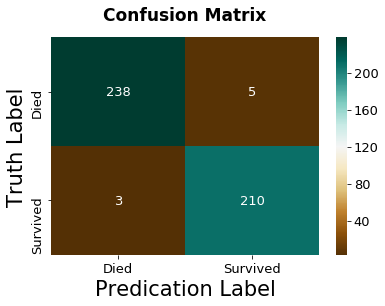

In [36]:
# Test the correctness of above rules we assumed for families in train set.
cm = confusion_matrix(train[train['Family_WCM_Survived'] != 0.5]['Family_WCM_Survived'],train[train['Family_WCM_Survived'] != 0.5]['Survived'])
cm = pd.DataFrame(cm,index=['Died','Survived'],columns=['Died','Survived'])
g = sns.heatmap(cm,cmap="BrBG",annot=True,fmt='g')
_ = g.set_xlabel('Predication Label')
_ = g.set_ylabel('Truth Label')
_ = g.set_title('Confusion Matrix', y=1.05, fontweight='bold')

It seems that only 7 out of 456 passengers in the train set doesn't obey these rules. The accuracy is 98.4%.

The second appoarch I tried is including __Family_WCM_Survived__ and __Family_Survived__ in the input for machine learning algorithms.
There are lots of rules hidden in these attributes. For example, female passengers in the third class having a large family have very low survival rate. It's not easy for human to extract these rules using analysis. Therefore, leave these jobs to algorithms.

In [37]:
# Survival rate for female passengers in the third class having more than 4 family members onboard
train[(train['Family_Size_Onboard'] >= 4) & (train['Sex'] == 1) & (train['Pclass'] == 3)]['Survived'].mean()

0.16666666666666666

## D. Forms of Variables

__Conitnuous, Discrete or Categoric Variables:__ Attributes have different forms, namely continous, discrete or categoric.
From my experience, it's hard to say certain kind of form is better than others. Different algorithms may work better with different form of variables.
Talking about cross validation accuracies, I found that continuous variables works better for algorithms involving large numbers of base estimators, such as gradient boosting, random forest and extra trees.
Traditional algorithms like logistic regression, k nearest neigbors, and so on, prefer discrete variables.
Categoric variables work better for decision tree.

Creating bins for __Age__ and __Fare__ seems to help improving the score given by Kaggle. Even though it decreases cross validation scores for some models mentioned in the previous paragraph.

__Normalization:__ The most important difference between machine learning algorithms is how they create decision boundaries between classes which is shown in the following image. Scaling of variables can certainly change these boundaries. Again, it's hard to tell how to achieve the best scaling. A uniform standard is to normalize variables to zero mean and unit deviation.

<img src="https://drive.google.com/open?id=1QOC7YMyO25p-W5CJHequunrBqG-POnFh" width="1000px" align="left"/>

In [38]:
# Create bins for Age and Fare according to previous analysis of KDE plots
for dataset in full_data:
    dataset['Age_Discrete'] = 0
    # The same as what I did for SibSp, Parch and Title, range of Age and Fare with larger survival rate is 
    # assigned a larger integer
    dataset.loc[dataset['Age'] <= 14,'Age_Discrete'] = 2
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 31),'Age_Discrete'] = 0
    dataset.loc[dataset['Age'] > 31,'Age_Discrete'] = 1
    dataset['Fare_Discrete'] = 0
    dataset.loc[dataset['Fare'] <= 2.6,'Fare_Discrete'] = 0
    dataset.loc[dataset['Fare'] > 2.6,'Fare_Discrete'] = 1

In [39]:
# Normalize numerical attributes
# After I tried different combinations of attributes, Pclass, Sex, Age, Fare, Title, Family_Size, Family_WCM_Survived and Family_Survived
# are the ones that help to increase cross validation accuracy
attributes = ['Pclass','Sex','Age_Discrete','Fare_Discrete','Title_Mapped','Family_Size','Family_WCM_Survived','Family_Survived']
for dataset in full_data:
    for attribute in attributes:
        mean_value = dataset[attribute].mean()
        std_value = dataset[attribute].std()
        dataset[attribute+'_Nor'] = dataset[attribute].apply(lambda x: (x-mean_value)/std_value)

# 2. Build Models and Generate Results

Lots of attributes, such as __SibSp__, __Parch__, __Embarked__, and __Deck__, won't increase either cross validation accuracy or Kaggle score. We drop them just like we combine values with similar survival rate, probably to prevent overfitting.

In [40]:
# Drop useless attributes
drop_attributes = ['Name','Ticket','SibSp','Parch','Cabin','Embarked','Title','Surname','Ticket_N','Family_Size_Onboard']
train = train.drop(drop_attributes, axis=1)
test = test.drop(drop_attributes, axis=1)

# Examine the data set one more time before we proceed
pd.set_option('display.max_columns',20)
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title_Mapped,Family_Size,Family_WCM_Survived,Family_Survived,Age_Discrete,Fare_Discrete,Pclass_Nor,Sex_Nor,Age_Discrete_Nor,Fare_Discrete_Nor,Title_Mapped_Nor,Family_Size_Nor,Family_WCM_Survived_Nor,Family_Survived_Nor
704,705,0,3,0,26.0,2.061048,0,3,0.0,0.0,0,0,0.826913,-0.737281,-0.834365,-1.037167,-0.801377,1.234953,-1.351511,-1.303289
655,656,0,2,0,24.0,4.297285,0,3,0.0,0.0,0,1,-0.369158,-0.737281,-0.834365,0.963083,-0.801377,1.234953,-1.351511,-1.303289
253,254,0,3,0,30.0,2.778819,0,3,0.0,0.0,0,1,0.826913,-0.737281,-0.834365,0.963083,-0.801377,1.234953,-1.351511,-1.303289
41,42,0,2,1,27.0,3.044522,2,3,0.0,0.0,0,1,-0.369158,1.354813,-0.834365,0.963083,1.320545,1.234953,-1.351511,-1.303289
291,292,1,1,1,19.0,4.511729,2,3,1.0,1.0,0,1,-1.565228,1.354813,-0.834365,0.963083,1.320545,1.234953,1.445693,1.505007
580,581,1,2,1,25.0,3.401197,2,3,1.0,1.0,0,1,-0.369158,1.354813,-0.834365,0.963083,1.320545,1.234953,1.445693,1.505007
356,357,1,1,1,22.0,4.007333,2,3,1.0,1.0,0,1,-1.565228,1.354813,-0.834365,0.963083,1.320545,1.234953,1.445693,1.505007
718,719,0,3,0,26.0,2.740840,0,2,0.0,0.0,0,1,0.826913,-0.737281,-0.834365,0.963083,-0.801377,-0.427197,-1.351511,-1.303289
201,202,0,3,0,26.0,4.242046,0,0,0.0,0.0,0,1,0.826913,-0.737281,-0.834365,0.963083,-0.801377,-3.751497,-1.351511,-1.303289
323,324,1,2,1,22.0,3.367296,2,3,1.0,1.0,0,1,-0.369158,1.354813,-0.834365,0.963083,1.320545,1.234953,1.445693,1.505007


In [41]:
test.sample(10)

,PassengerId,Pclass,Sex,Age,Fare,Title_Mapped,Family_Size,Family_WCM_Survived,Family_Survived,Age_Discrete,Fare_Discrete,Pclass_Nor,Sex_Nor,Age_Discrete_Nor,Fare_Discrete_Nor,Title_Mapped_Nor,Family_Size_Nor,Family_WCM_Survived_Nor,Family_Survived_Nor
144,1036,1,0,42.00,3.279030,0,2,0.5,0.5,1,1,-1.503319,-0.755024,0.769237,0.933995,-0.821598,-0.502832,-0.037290,0.058688
17,909,3,0,21.00,1.977547,0,2,0.5,0.5,0,0,0.872436,-0.755024,-0.776634,-1.068108,-0.821598,-0.502832,-0.037290,0.058688
286,1178,3,0,26.00,1.981001,0,2,0.5,0.5,0,0,0.872436,-0.755024,-0.776634,-1.068108,-0.821598,-0.502832,-0.037290,0.058688
277,1169,2,0,40.00,3.258097,0,3,0.5,1.0,1,1,-0.315441,-0.755024,0.769237,0.933995,-0.821598,1.205980,-0.037290,1.591915
42,934,3,0,41.00,2.060514,0,2,0.5,0.5,1,0,0.872436,-0.755024,0.769237,-1.068108,-0.821598,-0.502832,-0.037290,0.058688
320,1212,3,0,26.00,2.050913,0,2,0.0,0.0,0,0,0.872436,-0.755024,-0.776634,-1.068108,-0.821598,-0.502832,-1.985672,-1.474539
354,1246,3,1,0.17,3.024077,2,3,1.0,0.0,2,1,0.872436,1.321292,2.315108,0.933995,1.285321,1.205980,1.911093,-1.474539
2,894,2,0,62.00,2.270836,0,2,0.5,0.5,1,0,-0.315441,-0.755024,0.769237,-1.068108,-0.821598,-0.502832,-0.037290,0.058688
185,1077,2,0,40.00,2.772589,0,2,0.5,0.5,1,1,-0.315441,-0.755024,0.769237,0.933995,-0.821598,-0.502832,-0.037290,0.058688
196,1088,1,0,6.00,4.901564,1,3,1.0,1.0,2,1,-1.503319,-0.755024,2.315108,0.933995,0.231862,1.205980,1.911093,1.591915


In [42]:
# Data set with normalized attributes
train_1 = ['Pclass_Nor','Sex_Nor','Age_Discrete_Nor','Fare_Discrete_Nor','Title_Mapped_Nor','Family_Size_Nor']
train_target = ['Survived']

# Data set with family survival information
train_2 = ['Pclass_Nor','Sex_Nor','Age_Discrete_Nor','Fare_Discrete_Nor','Title_Mapped_Nor','Family_Size_Nor','Family_WCM_Survived','Family_Survived']

## A. Model I

In model I, a gradient boosting classifier is trained using attributes without family survival information. This classifier is used to make prediction for the test set. Afterwards, rules we assumed for families are enforced to make corrections.

In [43]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(train[train_1],train[train_target])
GBC_best = gsGBC.best_estimator_

GBC_predictions = GBC_best.predict(test[train_1])
GBC_predictions = pd.Series(GBC_predictions,name='Survived')

# Generate submission file for predictions by gradient boosting classifier
submission_GBC = pd.concat([passengerid,GBC_predictions],axis=1)
submission_GBC.to_csv('submission_GBC',index=False)
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   29.1s finished


0.835016835016835

In [44]:
# Enforce rules we assumed for families
n_rows = test.shape[0]
# Count the number of corrections made to the result
count = 0

for i in range(n_rows):
    family_wcm_survived = test.iloc[i]['Family_WCM_Survived']
    passenger_id = test.iloc[i]['PassengerId']
    # Use the result inferred from family members if gradient boosting gives a different prediction
    if family_wcm_survived != 0.5 and submission_GBC[submission_GBC['PassengerId'] == passenger_id]['Survived'].item() != family_wcm_survived:
        count += 1
        submission_GBC.loc[submission_GBC['PassengerId'] == passenger_id,'Survived'] = family_wcm_survived

# Generate submission file for model I
submission_GBC = submission_GBC.astype(int)
submission_GBC.to_csv('submission_M1',index=False)
print('Number of Corrections Made to the Prediction of Gradient Boosting Classifier: {}'.format(count))

Number of Corrections Made to the Prediction of Gradient Boosting Classifier: 18


## B. Model II

In model II, A stacking model is implemented. Six machine learning algorithms are used to generate meta features using attributes with family survival information. A XGBoost classifier uses these meata features to make predictions.

After some attempts, gradient boosting, random forest, extra trees, support vector machine with a rbf kernel, k nearest neighbors, and logistic regression are chosen to produce meta features since they have larger cross validation accuracies. 

### i. Hyperparameter Tuning of Base Models

In [45]:
# Record best cross validation accuracies for algorithms
best_scores = []

# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(train[train_2],train[train_target])
GBC_best = gsGBC.best_estimator_

# Generate the meta feature by gradient boosting classifier for test set
GBC_meta = GBC_best.predict(test[train_2])
GBC_meta = pd.Series(GBC_meta,name='GBC_meta')

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   28.9s finished


In [46]:
GBC_params = gsGBC.best_params_
best_scores.append(gsGBC.best_score_)

In [47]:
# Random forest tunning 
random_forest = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsRF = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRF.fit(train[train_2],train[train_target])
# Best score
RF_best = gsRF.best_estimator_

# Generate the meta feature by random forest classifier for test set
RF_meta = RF_best.predict(test[train_2])
RF_meta = pd.Series(RF_meta,name='RF_meta')
RF_params = gsRF.best_params_
best_scores.append(gsRF.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.9min finished


In [48]:
# ExtraTrees tunning
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(train[train_2],train[train_target])
ExtC_best = gsExtC.best_estimator_

# Generate the meta feature by extra trees classifier for test set
ET_meta = ExtC_best.predict(test[train_2])
ET_meta = pd.Series(ET_meta,name='ET_meta')
EetC_params = gsExtC.best_params_
best_scores.append(gsExtC.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   49.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  2.6min finished


In [49]:
# Support vector machine tunning
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1,10,50,100,200,300, 1000]}
gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsSVMC.fit(train[train_2],train[train_target])
SVMC_best = gsSVMC.best_estimator_

# Generate the meta feature by support vector machine classifier for test set
SVMC_meta = SVMC_best.predict(test[train_2])
SVMC_meta = pd.Series(SVMC_meta,name='SVMC_meta')

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    8.1s finished


In [50]:
SVMC_params = gsSVMC.best_params_
best_scores.append(gsSVMC.best_score_)

In [51]:
# K nearest neighbors tunning
KNN = KNeighborsClassifier()
knn_param_grid = {'n_neighbors':[3,5,8,13],
                  'algorithm': ['auto'],
                  'weights': ['uniform','distance'],
                  'leaf_size': list(range(1,50,5))}
gsKNN = GridSearchCV(KNN,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsKNN.fit(train[train_2],train[train_target])
KNN_best = gsKNN.best_estimator_

# Generate the meta feature by k nearest neighbors classifier for test set
KNN_meta = KNN_best.predict(test[train_2])
KNN_meta = pd.Series(KNN_meta,name='KNN_meta')

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    4.4s finished


In [52]:
KNN_params = gsKNN.best_params_
best_scores.append(gsKNN.best_score_)

In [53]:
# Logistic regression tunning
LogR = LogisticRegression()
LogR_param_grid = {'penalty': ['l1','l2'],
                  'C': [0.001,0.01,0.1,1,10,100,1000]}
gsLogR = GridSearchCV(LogR,param_grid = LogR_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsLogR.fit(train[train_2],train[train_target])
LogR_best = gsLogR.best_estimator_

# Generate the meta feature by k nearest neighbors classifier for test set
LogR_meta = LogR_best.predict(test[train_2])
LogR_meta = pd.Series(LogR_meta,name='LogR_meta')

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=4)]: Done 140 out of 140 | elapsed:    0.8s finished


In [54]:
LogR_params = gsLogR.best_params_
best_scores.append(gsLogR.best_score_)

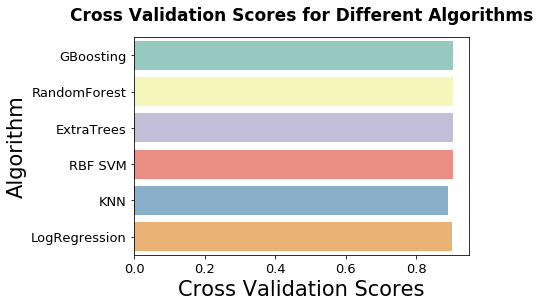

In [55]:
# Compare the best cross validation scores of these algorithms
cv_scores = pd.DataFrame({"Cross Validation Scores":best_scores,"Algorithm":['GBoosting',  'RandomForest', 'ExtraTrees',
    'RBF SVM','KNN','LogRegression']})

g = sns.barplot("Cross Validation Scores","Algorithm",data = cv_scores, palette="Set3",orient = "h")
_ = g.set_title("Cross Validation Scores for Different Algorithms",y=1.05,fontweight='bold')

__Notice that after family survival information is added, most of cross validation accuracies reaches more than 0.9.__

### ii. Stacking

In [56]:
# Generate test data set comprised of meta features
test_meta = pd.concat([GBC_meta,RF_meta,ET_meta,SVMC_meta,KNN_meta,LogR_meta],axis=1)

In [57]:
# Create classifier objects using optimal parameters
GBC = GradientBoostingClassifier(**GBC_params)
RF = RandomForestClassifier(**RF_params)
ExtC = ExtraTreesClassifier(**ExtC_params)
SVMC = SVC(**SVMC_params,probability=True)
KNN = KNeighborsClassifier(**KNN_params)
LogR = LogisticRegression(**LogR_params)

NameError: name 'ExtC_params' is not defined

In [ ]:
n = train.shape[0]
x_train = train[train_2].values
y_train = train[train_target].values

kf = KFold(n,10,random_state=2)
# Define a function to generate meta features using a manner of cross validation
def gen_meta_features(clf,x,y):
    feature = np.zeros((len(y),))
    for train_index,test_index in kf:
        model = clf.fit(x[train_index],y[train_index])
        feature[test_index] = model.predict(x[test_index])
    return feature

GBC_meta = pd.Series(gen_meta_features(GBC,x_train,y_train),name='GBC_meta')
RF_meta = pd.Series(gen_meta_features(RF,x_train,y_train),name='RF_meta')
ET_meta = pd.Series(gen_meta_features(ExtC,x_train,y_train),name='ET_meta')
SVMC_meta = pd.Series(gen_meta_features(SVMC,x_train,y_train),name='SVMC_meta')
KNN_meta = pd.Series(gen_meta_features(KNN,x_train,y_train),name='KNN_meta')
LogR_meta = pd.Series(gen_meta_features(LogR,x_train,y_train),name='LogR_meta')
# Generate train data set comprised of meta features
train_meta = pd.concat([GBC_meta,RF_meta,ET_meta,SVMC_meta,KNN_meta,LogR_meta],axis=1)

In [ ]:
# Train an XGBoost Classifier using meta features of train set
gbm = xgb.XGBClassifier(learning_rate = 0.95,
 n_estimators= 5000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=1,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train).fit(train_meta, train[train_target])

# Make predictions using meta features of test set
stacking_predictions = gbm.predict(test_meta)
stacking_predictions = pd.Series(stacking_predictions,name='Survived')

# Generate submission file for predictions by the stacking model
submission_stacking = pd.concat([passengerid,stacking_predictions],axis=1)
submission_stacking.to_csv('submission_stacking',index=False)

In [ ]:
# Check whether rules we assumed for family members are already learnt by algorithms
n_rows = test.shape[0]
# Count the number of corrections made to the result predicted by the stacking model
count = 0

for i in range(n_rows):
    family_wcm_survived = test.iloc[i]['Family_WCM_Survived']
    passenger_id = test.iloc[i]['PassengerId']
    # Use the result inferred from other family members if stacking model gives a different prediction
    if family_wcm_survived != 0.5 and submission_stacking[submission_stacking['PassengerId'] == passenger_id]['Survived'].item() != family_wcm_survived:
        count += 1

print('Number of Corrections Made to the Prediction of Model II: {}'.format(count))

It can be seen that no correction is made to the prediction of model II. Machine learning algorithms really learnt the rules we assumed for family members after family survival information is used as features.
For Model I, Kaggle gives me a scores of 0.827. For Model II, it is 0.818. I cheat a little by changing a Sweet, 14 years old boy, traveling with family Herman to death. It increases my score by 0.005.

From my experiences, it often happens that you get a high cross validation accuracy while Kaggle gives you a bad score. One thing to keep in mind is that the leaderboard score is only evaluated using a subset of test data. Final score will probably be evaluated using a rather different subset.

It might be possible to extract cabin location information from __Cabin__ and __Ticket__ to achieve further improvement. 